In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
numb_x_src_path = '../../Dataset/MixedDataSet.json'
y_src_path = '../../DataBook/Mixed_Data_Analyst.xlsx'

In [3]:
numb_data = pd.read_json(numb_x_src_path)
numb_data = numb_data.iloc[:, :-59022]

In [4]:
df_supervision = pd.read_excel(y_src_path)
plagiarised_array = df_supervision['Plagiarised'].astype(int).values

In [5]:
X_N = np.nan_to_num(numb_data.values, nan=0, copy=True).astype(int)
y = plagiarised_array

In [6]:
X_N_train, X_N_test, y_N_train, y_N_test = train_test_split(X_N, y, test_size=0.2, random_state=32)

In [7]:
# scaler = StandardScaler()
# X_N_train = scaler.fit_transform(X_N_train)
# X_N_test = scaler.fit_transform(X_N_test)

In [55]:
from xgboost import XGBClassifier


numbP = XGBClassifier()
numbP.fit(X_N_train,y_N_train)

percepPredict = numbP.predict(X_N_test)

print(f"Training data score: {numbP.score(X_N_train, y_N_train)}")
print(f"Test data score: {numbP.score(X_N_test, y_N_test)}")

from sklearn.metrics import accuracy_score, classification_report
y_pred = numbP.predict(X_N_test)
accuracy = accuracy_score(y_N_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_N_test, y_pred))

unique_labels = set(y_N_test)
for label in unique_labels:
    indices = (y_N_test == label)
    accuracy = accuracy_score(y_N_test[indices], percepPredict[indices])
    print(f"Accuracy for class {label}: {accuracy}")

Training data score: 1.0
Test data score: 0.9259259259259259
Accuracy: 0.9259259259259259
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.60      0.75         5

    accuracy                           0.93        27
   macro avg       0.96      0.80      0.85        27
weighted avg       0.93      0.93      0.92        27

Accuracy for class 0: 1.0
Accuracy for class 1: 0.6


In [51]:
from sklearn.tree import DecisionTreeClassifier

numbP = DecisionTreeClassifier()
numbP.fit(X_N_train,y_N_train)

percepPredict = numbP.predict(X_N_test)

print(f"Training data score: {numbP.score(X_N_train, y_N_train)}")
print(f"Test data score: {numbP.score(X_N_test, y_N_test)}")

from sklearn.metrics import accuracy_score, classification_report
y_pred = numbP.predict(X_N_test)
accuracy = accuracy_score(y_N_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_N_test, y_pred))

unique_labels = set(y_N_test)
for label in unique_labels:
    indices = (y_N_test == label)
    accuracy = accuracy_score(y_N_test[indices], percepPredict[indices])
    print(f"Accuracy for class {label}: {accuracy}")

Training data score: 1.0
Test data score: 0.7777777777777778
Accuracy: 0.7777777777777778
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        22
           1       0.33      0.20      0.25         5

    accuracy                           0.78        27
   macro avg       0.58      0.55      0.56        27
weighted avg       0.74      0.78      0.75        27

Accuracy for class 0: 0.9090909090909091
Accuracy for class 1: 0.2


In [54]:
from sklearn.linear_model import LogisticRegression

numbP = LogisticRegression(max_iter=100000)
numbP.fit(X_N_train,y_N_train)

percepPredict = numbP.predict(X_N_test)

print(f"Training data score: {numbP.score(X_N_train, y_N_train)}")
print(f"Test data score: {numbP.score(X_N_test, y_N_test)}")

from sklearn.metrics import accuracy_score, classification_report
y_pred = numbP.predict(X_N_test)
accuracy = accuracy_score(y_N_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_N_test, y_pred))

unique_labels = set(y_N_test)
for label in unique_labels:
    indices = (y_N_test == label)
    accuracy = accuracy_score(y_N_test[indices], percepPredict[indices])
    print(f"Accuracy for class {label}: {accuracy}")

Training data score: 1.0
Test data score: 0.9259259259259259
Accuracy: 0.9259259259259259
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.80      0.80      0.80         5

    accuracy                           0.93        27
   macro avg       0.88      0.88      0.88        27
weighted avg       0.93      0.93      0.93        27

Accuracy for class 0: 0.9545454545454546
Accuracy for class 1: 0.8


In [44]:
NPH = 32
numb_model = keras.models.Sequential([
    keras.layers.Input(shape=(16689,)),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

LOSS_FN = keras.losses.BinaryCrossentropy()

numb_model.compile(optimizer='adam', loss=LOSS_FN, metrics=['accuracy'])

history = numb_model.fit(X_N_train, y_N_train, epochs=10, validation_data=(X_N_test, y_N_test))

y_pred_numb_binary_flat = (numb_model.predict(X_N_test).flatten() > 0.5).astype(int)

Epoch 1/10
4/4 [==============================] - 1s 47ms/step - loss: 1168.8022 - accuracy: 0.6698 - val_loss: 98.8418 - val_accuracy: 0.7407
Epoch 2/10
4/4 [==============================] - 0s 14ms/step - loss: 529.8560 - accuracy: 0.7642 - val_loss: 1659.5243 - val_accuracy: 0.4444
Epoch 3/10
4/4 [==============================] - 0s 14ms/step - loss: 822.3610 - accuracy: 0.7453 - val_loss: 331.1096 - val_accuracy: 0.8148
Epoch 4/10
4/4 [==============================] - 0s 12ms/step - loss: 720.6300 - accuracy: 0.8774 - val_loss: 170.0791 - val_accuracy: 0.8889
Epoch 5/10
4/4 [==============================] - 0s 11ms/step - loss: 148.7280 - accuracy: 0.7925 - val_loss: 69.6192 - val_accuracy: 0.8889
Epoch 6/10
4/4 [==============================] - 0s 13ms/step - loss: 231.5320 - accuracy: 0.7547 - val_loss: 97.4405 - val_accuracy: 0.9259
Epoch 7/10
4/4 [==============================] - 0s 12ms/step - loss: 291.3207 - accuracy: 0.8868 - val_loss: 204.0920 - val_accuracy: 0.9630


In [53]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_N_test, y_pred_numb_binary_flat)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_N_test, y_pred_numb_binary_flat))

unique_labels = set(y_N_test)
for label in unique_labels:
    indices = (y_N_test == label)
    accuracy = accuracy_score(y_N_test[indices], y_pred_numb_binary_flat[indices])
    print(f"Accuracy for class {label}: {accuracy}")

Accuracy: 0.9629629629629629
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.80      0.89         5

    accuracy                           0.96        27
   macro avg       0.98      0.90      0.93        27
weighted avg       0.96      0.96      0.96        27

Accuracy for class 0: 1.0
Accuracy for class 1: 0.8


In [48]:
# numb_model.summary()
# numb_model.save("good_model.h5")

c:\Users\K-Gen\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
for numb, percep, actual in zip(y_pred_numb_binary_flat, percepPredict, y_N_test):
    print(f"Number: {numb}, Perceptron: {percep} Actual: {actual}")

Number: 0, Perceptron: 0 Actual: 0
Number: 1, Perceptron: 1 Actual: 1
Number: 1, Perceptron: 1 Actual: 1
Number: 0, Perceptron: 0 Actual: 1
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 1, Perceptron: 1 Actual: 1
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 1, Perceptron: 1 Actual: 1
Number: 0, Perceptron: 1 Actual: 0
Number: 0, Perceptron: 0 Actual: 0


In [49]:
print(numb_model.evaluate(X_N_test,y_N_test)[1])
#numb_model.save("haldmodel.h5")

1/1 [==============================] - 0s 24ms/step - loss: 108.8563 - accuracy: 0.9630
0.9629629850387573


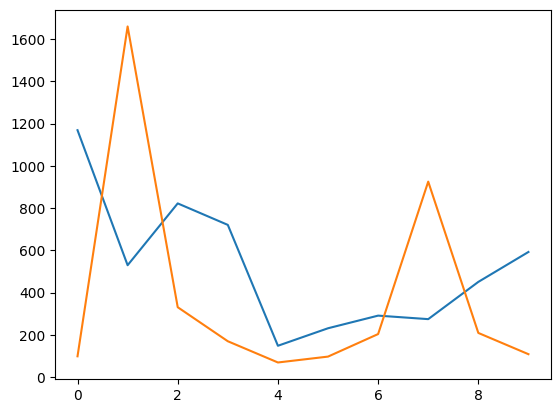

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

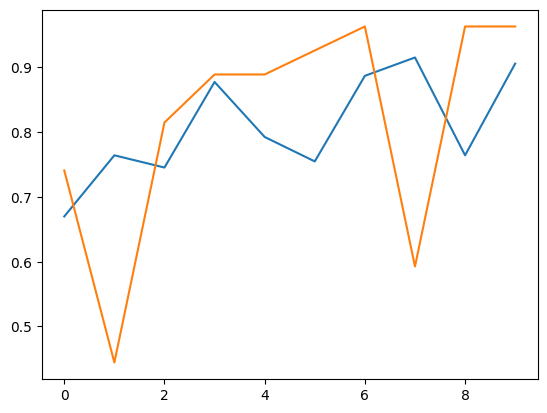

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])